In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
from simulate import simulate
from agent import GreedyAgent, EpsilonGreedyAgent
from environment import Environment

# K-armed Bandit

In [28]:
k_arms = 10

## Reward Distribution

Mean: [ 0.56308946 -0.61195796 -0.8952233  -0.33699125 -2.13388981 -0.36562464
 -1.69169537 -0.81343783  0.70300694 -0.9191443 ]


Text(0, 0.5, 'Reward distribution')

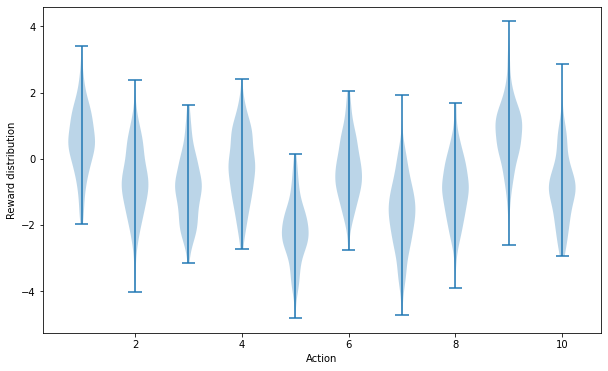

In [26]:
np.random.seed(None)

q_true = np.random.randn(k_arms)
dist = np.random.randn(200, k_arms) + q_true

print(f"Mean: {q_true}")
ax = plt.gca()
figure = plt.gcf()
figure.set_size_inches(10, 6)
plt.violinplot(dataset=dist)
plt.xlabel("Action")
plt.ylabel("Reward distribution")

## $\epsilon$-greedy

In [40]:
epsilons = [0, 0.1, 0.01]
runs = 2000
times = 1000

bandits = [EpsilonGreedyAgent(epsilon=eps, k_arm=k_arms) for eps in epsilons]
envs = [Environment(k_arm=k_arms) for i in range(len(epsilons))]

In [41]:
rewards = simulate(runs, times, bandits, envs)

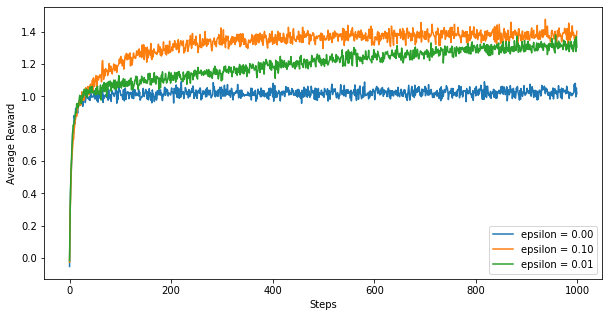

In [53]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 1, 1)
for eps, reward in zip(epsilons, rewards):
    plt.plot(reward, label="epsilon = %.02f" % (eps))
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.legend()